Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\26485\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\26485\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\26485\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\26485\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\26485\anaconda3\lib\site-packages\s

Gradient Boosting CV R2 Score (5-fold): 0.9205765366791526
Random Forest CV R2 Score (5-fold): 0.9294672158718656

Model Comparison on Test Set:
Gradient Boosting - MAE: 0.6428416656104624, RMSE: 0.9546312953269466, R2 Score: 0.9423234509898847
Random Forest - MAE: 0.6030160671797535, RMSE: 0.8547797525425037, R2 Score: 0.9537580239287707


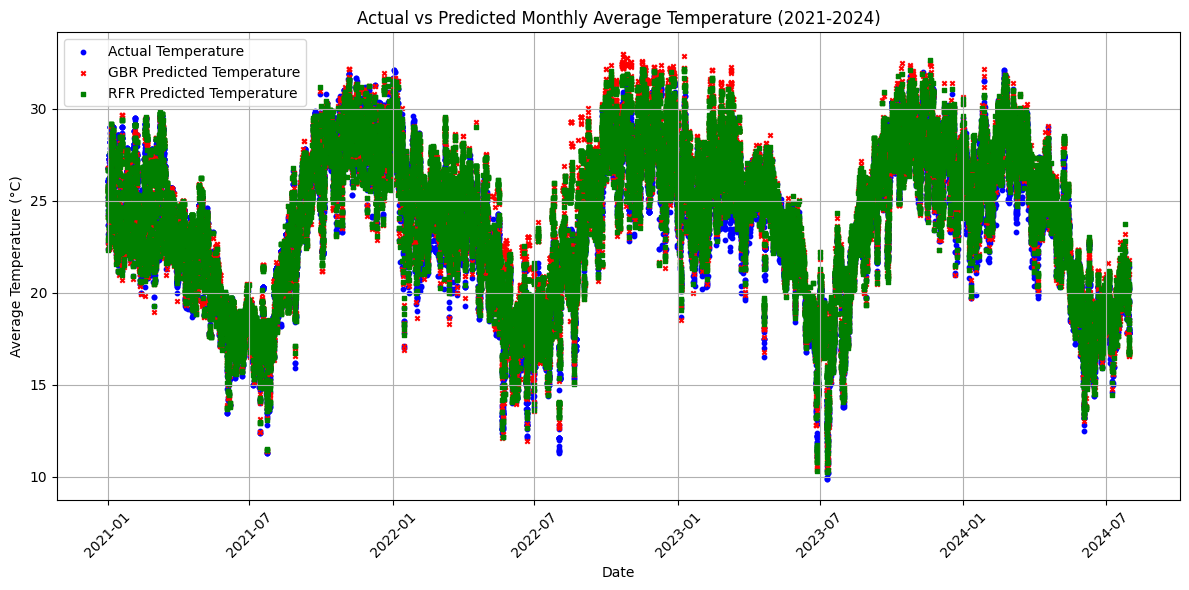

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset and specify the 'datetime' column to be of type string
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)

# Convert the 'datetime' column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)  # Drop rows with invalid dates


# Filter the dataset to only include data between 2004 and 2024
df_filtered = df[(df['datetime'].dt.year >= 2004) & (df['datetime'].dt.year <= 2024)]

# Select relevant columns for temperature prediction
features = ['tempmax', 'tempmin', 'precip', 'precipprob', 'precipcover', 'cloudcover', 'windspeed']
target = 'tempavg'

# Split the data into training and testing sets
train_data = df_filtered[df_filtered['datetime'].dt.year < 2021]
test_data = df_filtered[df_filtered['datetime'].dt.year >= 2021]

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Define the Gradient Boosting Regressor model and its parameter grid
gbr = GradientBoostingRegressor()
gbr_param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'subsample': [0.8, 1.0]
}

# Define the Random Forest Regressor model and its parameter grid
rfr = RandomForestRegressor()
rfr_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15, None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['auto', 'sqrt']
}

# Tune Gradient Boosting Regressor using RandomizedSearchCV
gbr_random_search = RandomizedSearchCV(
    estimator=gbr, param_distributions=gbr_param_grid,
    n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42
)
gbr_random_search.fit(X_train, y_train)
best_gbr = gbr_random_search.best_estimator_

# Tune Random Forest Regressor using RandomizedSearchCV
rfr_random_search = RandomizedSearchCV(
    estimator=rfr, param_distributions=rfr_param_grid,
    n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42
)
rfr_random_search.fit(X_train, y_train)
best_rfr = rfr_random_search.best_estimator_

# Perform cross-validation and calculate mean cross-validation score for both models
gbr_cv_scores = cross_val_score(best_gbr, X_train, y_train, cv=5, scoring='r2')
rfr_cv_scores = cross_val_score(best_rfr, X_train, y_train, cv=5, scoring='r2')
print(f"Gradient Boosting CV R2 Score (5-fold): {np.mean(gbr_cv_scores)}")
print(f"Random Forest CV R2 Score (5-fold): {np.mean(rfr_cv_scores)}")

# Evaluate both models on the test set
y_pred_gbr = best_gbr.predict(X_test)
y_pred_rfr = best_rfr.predict(X_test)

# Calculate evaluation metrics for Gradient Boosting Regressor
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

# Calculate evaluation metrics for Random Forest Regressor
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)

# Print model comparison results
print("\nModel Comparison on Test Set:")
print(f"Gradient Boosting - MAE: {mae_gbr}, RMSE: {rmse_gbr}, R2 Score: {r2_gbr}")
print(f"Random Forest - MAE: {mae_rfr}, RMSE: {rmse_rfr}, R2 Score: {r2_rfr}")

# Plotting actual vs predicted temperatures for both models without connecting lines
plt.figure(figsize=(12, 6))
plt.scatter(test_data['datetime'], y_test, label='Actual Temperature', color='blue', marker='o', s=10)
plt.scatter(test_data['datetime'], y_pred_gbr, label='GBR Predicted Temperature', color='red', marker='x', s=10)
plt.scatter(test_data['datetime'], y_pred_rfr, label='RFR Predicted Temperature', color='green', marker='s', s=10)
plt.title('Actual vs Predicted Monthly Average Temperature (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest CV R2 Score (5-fold): 0.9314340671108752

Random Forest Model Performance on Test Set:
MAE: 0.6070751994986757
RMSE: 0.8648686243820565
R2 Score: 0.9526600040790136


C:\Users\26485\AppData\Local\Temp\ipykernel_9824\2360990679.py:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_data_resampled = test_data.set_index('datetime')[features + [target]].resample('M').mean()
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\2360990679.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_pred_rfr_resampled = pd.Series(y_pred_rfr, index=test_data['datetime']).resample('M').mean()


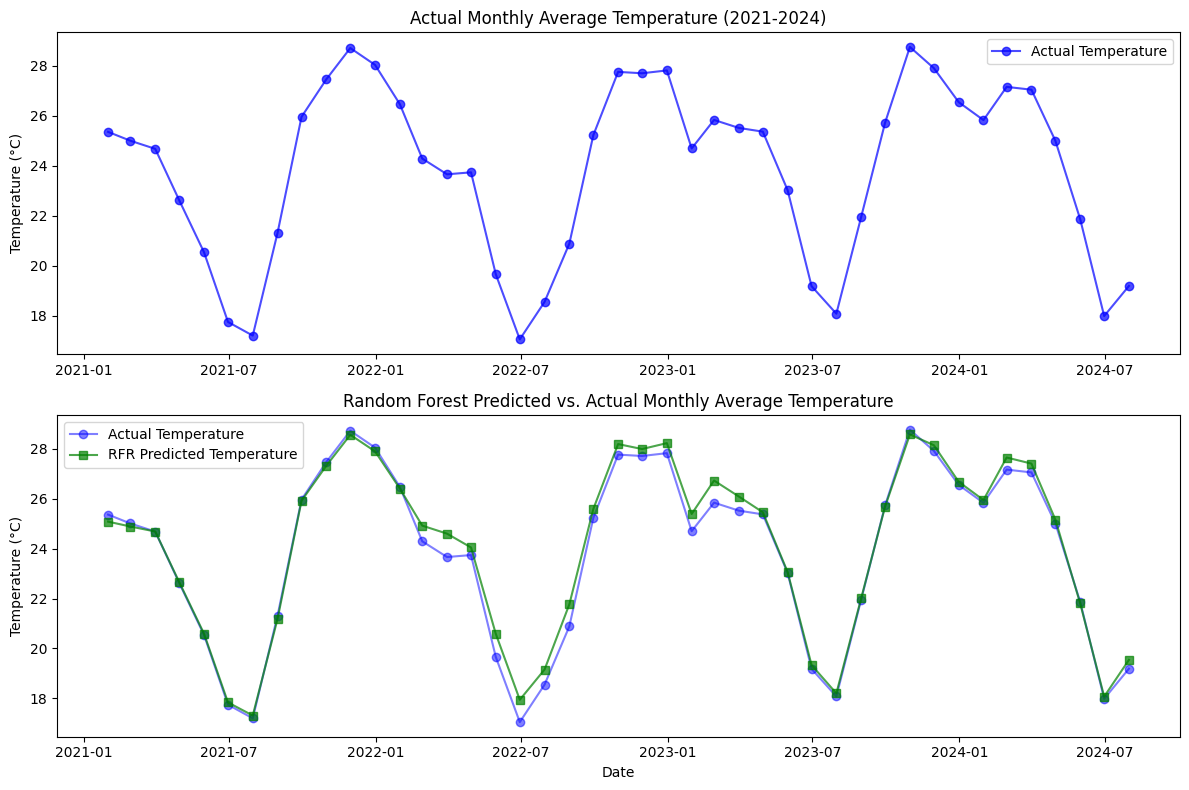

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset and specify the 'datetime' column to be of type string
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)

# Convert the 'datetime' column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)  # Drop rows with invalid dates

# Filter the dataset to only include data between 2004 and 2024
df_filtered = df[(df['datetime'].dt.year >= 2004) & (df['datetime'].dt.year <= 2024)]

# Select relevant columns for temperature prediction
features = ['tempmax', 'tempmin', 'precip', 'precipprob', 'precipcover', 'cloudcover', 'windspeed']
target = 'tempavg'

# Split the data into training and testing sets
train_data = df_filtered[df_filtered['datetime'].dt.year < 2021]
test_data = df_filtered[df_filtered['datetime'].dt.year >= 2021]

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Define the Random Forest Regressor model and its parameter grid
rfr = RandomForestRegressor()
rfr_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15, None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt', 'log2', None]  # Replaced 'auto' with 'None'
}

# Tune Random Forest Regressor using RandomizedSearchCV
rfr_random_search = RandomizedSearchCV(
    estimator=rfr, param_distributions=rfr_param_grid,
    n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42
)
rfr_random_search.fit(X_train, y_train)
best_rfr = rfr_random_search.best_estimator_

# Perform cross-validation and calculate mean cross-validation score
rfr_cv_scores = cross_val_score(best_rfr, X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest CV R2 Score (5-fold): {np.mean(rfr_cv_scores)}")

# Predict on the test set
y_pred_rfr = best_rfr.predict(X_test)

# Calculate evaluation metrics
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)

print("\nRandom Forest Model Performance on Test Set:")
print(f"MAE: {mae_rfr}")
print(f"RMSE: {rmse_rfr}")
print(f"R2 Score: {r2_rfr}")

# Resample test data for monthly averages
# Select only numeric columns to avoid issues with resampling
test_data_resampled = test_data.set_index('datetime')[features + [target]].resample('M').mean()
y_test_resampled = test_data_resampled[target]

# Resample predictions to match monthly averages
y_pred_rfr_resampled = pd.Series(y_pred_rfr, index=test_data['datetime']).resample('M').mean()

# Plotting actual vs predicted temperatures for Random Forest model
plt.figure(figsize=(12, 8))

# Plot Actual Temperature
plt.subplot(2, 1, 1)
plt.plot(y_test_resampled.index, y_test_resampled, label='Actual Temperature', color='blue', marker='o', alpha=0.7)
plt.title('Actual Monthly Average Temperature (2021-2024)')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot Random Forest Predictions
plt.subplot(2, 1, 2)
plt.plot(y_test_resampled.index, y_test_resampled, label='Actual Temperature', color='blue', marker='o', alpha=0.5)
plt.plot(y_pred_rfr_resampled.index, y_pred_rfr_resampled, label='RFR Predicted Temperature', color='green', marker='s', alpha=0.7)
plt.title('Random Forest Predicted vs. Actual Monthly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
155238/155238 ━━━━━━━━━━━━━━━━━━━━ 733s 5ms/step - loss: 0.0036
Epoch 2/10
155238/155238 ━━━━━━━━━━━━━━━━━━━━ 721s 5ms/step - loss: 0.0026
Epoch 3/10
155238/155238 ━━━━━━━━━━━━━━━━━━━━ 724s 5ms/step - loss: 0.0024
Epoch 4/10
155238/155238 ━━━━━━━━━━━━━━━━━━━━ 710s 5ms/step - loss: 0.0024
Epoch 5/10
155238/155238 ━━━━━━━━━━━━━━━━━━━━ 713s 5ms/step - loss: 0.0023
Epoch 6/10
155238/155238 ━━━━━━━━━━━━━━━━━━━━ 709s 5ms/step - loss: 0.0022
Epoch 7/10
155238/155238 ━━━━━━━━━━━━━━━━━━━━ 708s 5ms/step - loss: 0.0021
Epoch 8/10
155238/155238 ━━━━━━━━━━━━━━━━━━━━ 732s 5ms/step - loss: 0.0020
Epoch 9/10
155238/155238 ━━━━━━━━━━━━━━━━━━━━ 710s 5ms/step - loss: 0.0019
Epoch 10/10
155238/155238 ━━━━━━━━━━━━━━━━━━━━ 725s 5ms/step - loss: 0.0019
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Evaluation Metrics for LSTM on Validation Set (2021-2024):
Mean Absolute Error (MAE): 0.9486698097011007
Root Mean Squared Error (RMSE): 1.2994575858550064
R² Score: 0.8931628876688489


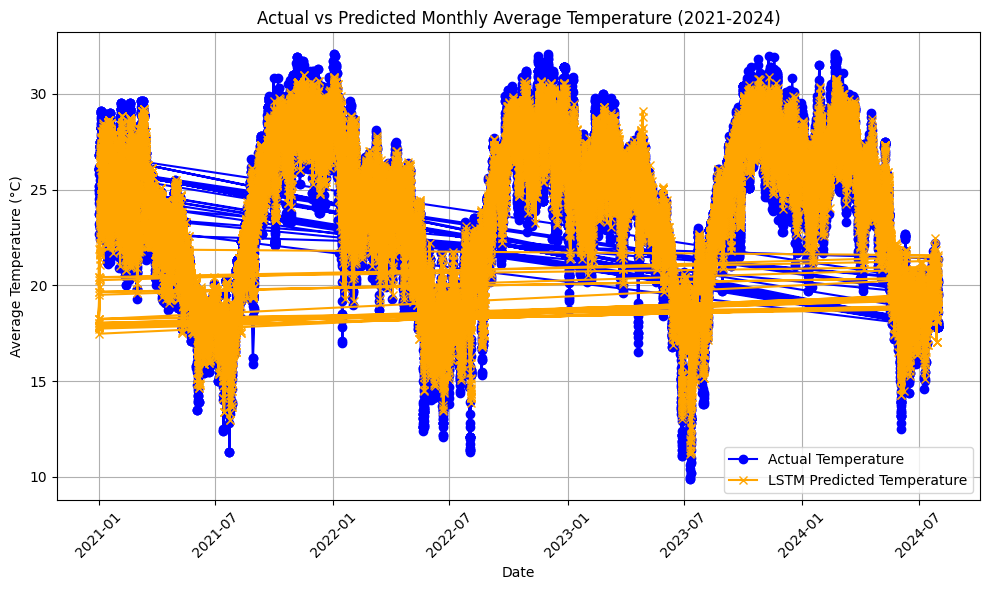

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset and specify the 'datetime' column to be of type string
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)

# Convert the 'datetime' column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)  # Drop rows with invalid dates

# Filter the dataset to only include data up to 2024
df_filtered = df[(df['datetime'].dt.year >= 2004) & (df['datetime'].dt.year <= 2024)]
train_data = df_filtered[df_filtered['datetime'].dt.year < 2021]
test_data = df_filtered[(df_filtered['datetime'].dt.year >= 2021) & (df_filtered['datetime'].dt.year <= 2024)]

# Use only the target variable for now
train_values = train_data[['tempavg']].values
test_values = test_data[['tempavg']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_normalized = scaler.fit_transform(train_values)
test_normalized = scaler.transform(test_values)

# Prepare the data for LSTM (create sequences)
sequence_length = 12  # Using 12 months (1 year) as input to predict the next month
X_train, y_train = [], []
for i in range(sequence_length, len(train_normalized)):
    X_train.append(train_normalized[i-sequence_length:i, 0])  # Last 12 months
    y_train.append(train_normalized[i, 0])  # Target is the next month's temperature

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape X_train to be 3D for LSTM (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

# Prepare the test data for prediction
X_test, y_test = [], []
for i in range(sequence_length, len(test_normalized)):
    X_test.append(test_normalized[i-sequence_length:i, 0])  # Last 12 months
    y_test.append(test_normalized[i, 0])  # Target is the next month's temperature

X_test = np.array(X_test)
y_test = np.array(y_test)

# Reshape X_test to be 3D for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions for the validation period (2021–2024)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform for actual values

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("Evaluation Metrics for LSTM on Validation Set (2021-2024):")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted temperatures for the validation period
plt.figure(figsize=(10, 6))
plt.plot(test_data['datetime'].iloc[sequence_length:], y_test, label='Actual Temperature', color='blue', marker='o')
plt.plot(test_data['datetime'].iloc[sequence_length:], predictions, label='LSTM Predicted Temperature', color='orange', marker='x')
plt.title('Actual vs Predicted Monthly Average Temperature (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

C:\Users\26485\AppData\Local\Temp\ipykernel_9824\2483874810.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2025-01-01', periods=5*12, freq='M')


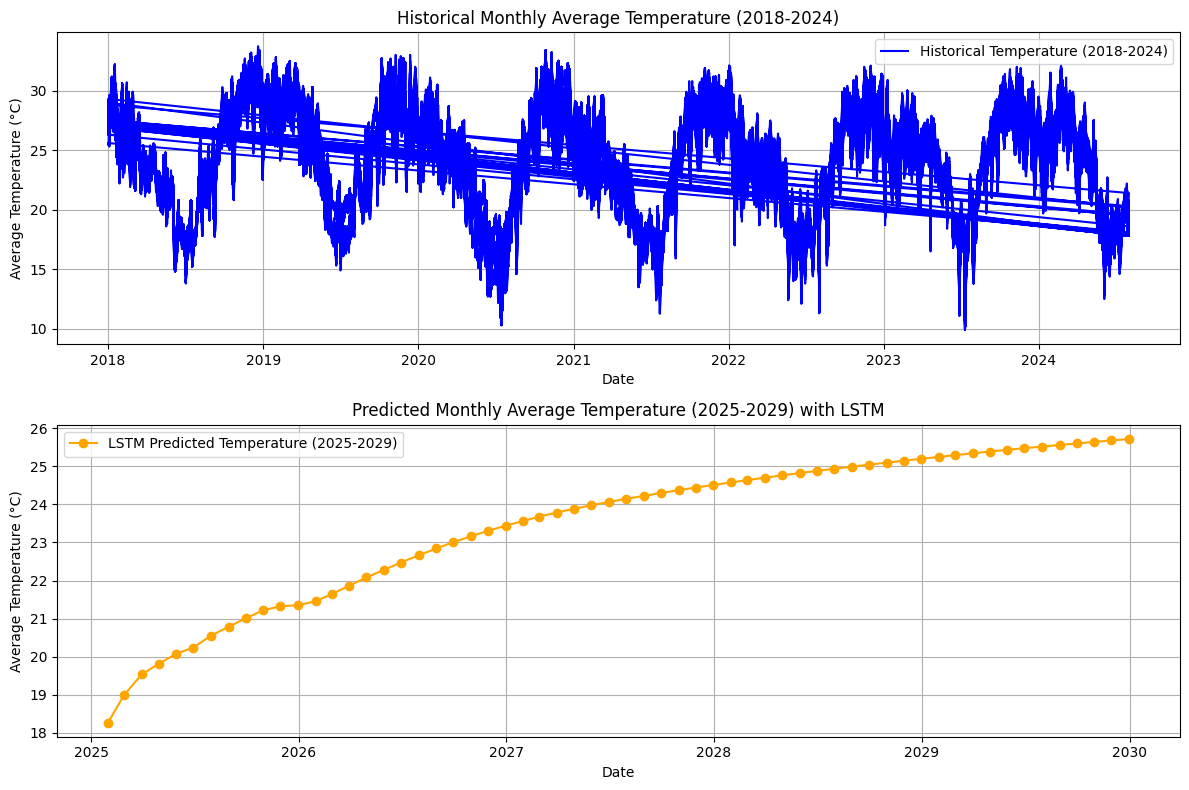

In [12]:
# Predict future temperatures for the next 5 years (2025–2029)
future_predictions = []
current_input = test_normalized[-sequence_length:]  # Start with the last observed sequence from 2024

for _ in range(5 * 12):  # Predict for 5 years (60 months)
    current_input = np.reshape(current_input, (1, sequence_length, 1))
    next_pred = model.predict(current_input)
    future_predictions.append(next_pred[0, 0])  # Store the prediction
    # Update current_input with the new prediction
    next_pred_reshaped = np.array([[next_pred[0, 0]]])  # Reshape to (1, 1)
    current_input = np.append(current_input[:, 1:, :], next_pred_reshaped[:, :, np.newaxis], axis=1)  # Slide the window

# Inverse transform the predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates for the predictions
future_dates = pd.date_range(start='2025-01-01', periods=5*12, freq='M')

# Plot the results with improved visualization
plt.figure(figsize=(12, 8))

# Subplot 1: Recent Historical Temperature (2018–2024)
plt.subplot(2, 1, 1)
recent_data = df_filtered[(df_filtered['datetime'] >= '2018-01-01') & (df_filtered['datetime'] <= '2024-12-31')]
plt.plot(recent_data['datetime'], recent_data['tempavg'], label='Historical Temperature (2018-2024)', color='blue')
plt.title('Historical Monthly Average Temperature (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)

# Subplot 2: Future Predicted Temperature (2025–2029)
plt.subplot(2, 1, 2)
plt.plot(future_dates, future_predictions, label='LSTM Predicted Temperature (2025-2029)', color='orange', marker='o')
plt.title('Predicted Monthly Average Temperature (2025-2029) with LSTM')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3475936836.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['trend'] = decomposition.trend
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3475936836.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['seasonal'] = decomposition.seasonal
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3475936836.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Epoch 1/10
117972/117972 ━━━━━━━━━━━━━━━━━━━━ 1044s 9ms/step - loss: 0.0038
Epoch 2/10
117972/117972 ━━━━━━━━━━━━━━━━━━━━ 13462s 114ms/step - loss: 0.0030
Epoch 3/10
117972/117972 ━━━━━━━━━━━━━━━━━━━━ 1007s 9ms/step - loss: 0.0027
Epoch 4/10
117972/117972 ━━━━━━━━━━━━━━━━━━━━ 1031s 9ms/step - loss: 0.0026
Epoch 5/10
117972/117972 ━━━━━━━━━━━━━━━━━━━━ 1032s 9ms/step - loss: 0.0025
Epoch 6/10
117972/117972 ━━━━━━━━━━━━━━━━━━━━ 985s 8ms/step - loss: 0.0025
Epoch 7/10
117972/117972 ━━━━━━━━━━━━━━━━━━━━ 1016s 9ms/step - loss: 0.0024
Epoch 8/10
117972/117972 ━━━━━━━━━━━━━━━━━━━━ 999s 8ms/step - loss: 0.0023
Epoch 9/10
117972/117972 ━━━━━━━━━━━━━━━━━━━━ 997s 8ms/step - loss: 0.0023
Epoch 10/10
117972/117972 ━━━━━━━━━━━━━━━━━━━━ 1016s 9ms/step - loss: 0.0022
777/777 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
LSTM Model Evaluation (2021-2024):
MAE: 0.9520492659360742
RMSE: 1.285123491063246
R² Score: 0.8971017914323665


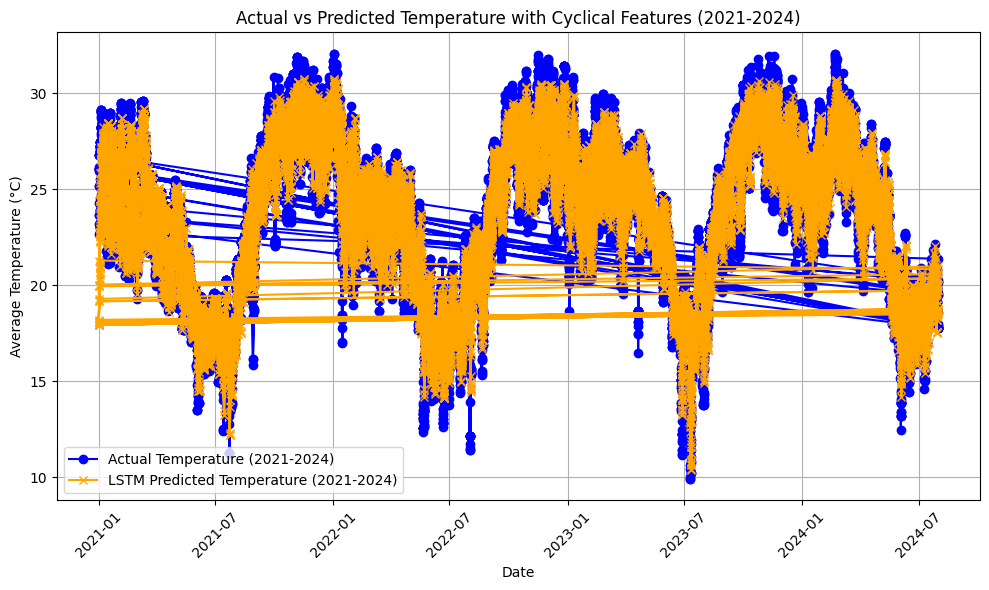

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset and specify the 'datetime' column to be of type string
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)

# Filter data up to 2024
df_filtered = df[(df['datetime'].dt.year >= 2004) & (df['datetime'].dt.year <= 2024)]
df_filtered.set_index('datetime', inplace=True)

# Decompose the temperature series to separate trend, seasonal, and residual components
decomposition = seasonal_decompose(df_filtered['tempavg'], model='additive', period=12)
df_filtered['trend'] = decomposition.trend
df_filtered['seasonal'] = decomposition.seasonal
df_filtered['residual'] = decomposition.resid

# Use only the trend and residual components for LSTM training
df_filtered['adjusted_tempavg'] = df_filtered['trend'] + df_filtered['residual']
df_filtered.dropna(inplace=True)  # Drop rows with NaN values from decomposition

# Add cyclical features for the month
df_filtered['month'] = df_filtered.index.month
df_filtered['month_sin'] = np.sin(2 * np.pi * df_filtered['month'] / 12)
df_filtered['month_cos'] = np.cos(2 * np.pi * df_filtered['month'] / 12)

# Select the adjusted target and cyclical features
features = ['month_sin', 'month_cos']
target = 'adjusted_tempavg'

# Split into training (up to 2020) and testing sets (2021-2024)
train_data = df_filtered[df_filtered.index.year < 2021]
test_data = df_filtered[(df_filtered.index.year >= 2021) & (df_filtered.index.year <= 2024)]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_values = scaler.fit_transform(train_data[[target]])
test_values = scaler.transform(test_data[[target]])

# Prepare data for LSTM with sequence input
sequence_length = 12
X_train, y_train = [], []
for i in range(sequence_length, len(train_values)):
    X_train.append(train_values[i-sequence_length:i, 0])  # Last 12 months
    y_train.append(train_values[i, 0])  # Target is next month's temp

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

# Validate on test set (2021-2024)
X_test, y_test = [], []
for i in range(sequence_length, len(test_values)):
    X_test.append(test_values[i-sequence_length:i, 0])
    y_test.append(test_values[i, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict and evaluate
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert predictions back to original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation Metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("LSTM Model Evaluation (2021-2024):")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted for validation
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], y_test, label='Actual Temperature (2021-2024)', color='blue', marker='o')
plt.plot(test_data.index[sequence_length:], predictions, label='LSTM Predicted Temperature (2021-2024)', color='orange', marker='x')
plt.title('Actual vs Predicted Temperature with Cyclical Features (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##PREDICTING


C:\Users\26485\AppData\Local\Temp\ipykernel_9824\1811898743.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['tempavg'].resample('M').mean()
C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0564
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0113
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0070
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0061


C:\Users\26485\AppData\Local\Temp\ipykernel_9824\1811898743.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2025-01-01', end='2029-12-31', freq='M')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

C:\Users\26485\AppData\Local\Temp\ipykernel_9824\1811898743.py:73: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  historical_annual = historical_data['tempavg'].resample('Y').mean()
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\1811898743.py:74: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  predicted_annual = pd.Series(future_predictions, index=future_dates).resample('Y').mean()


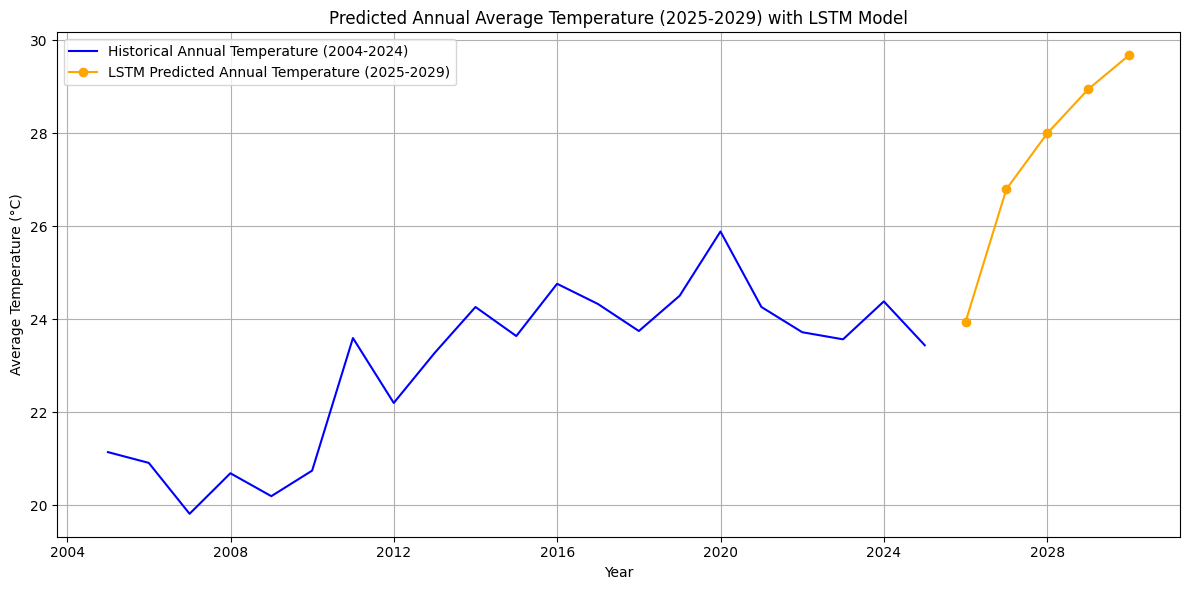

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)
df.set_index('datetime', inplace=True)

# Downsample data to monthly frequency by averaging
monthly_data = df['tempavg'].resample('M').mean()
historical_data = monthly_data[(monthly_data.index.year >= 2004) & (monthly_data.index.year <= 2024)]

# Add cyclical features for the month
historical_data = historical_data.to_frame(name='tempavg')
historical_data['month'] = historical_data.index.month
historical_data['month_sin'] = np.sin(2 * np.pi * historical_data['month'] / 12)
historical_data['month_cos'] = np.cos(2 * np.pi * historical_data['month'] / 12)

# Normalize temperature for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
historical_data['tempavg_scaled'] = scaler.fit_transform(historical_data[['tempavg']])

# Prepare data for LSTM with sequence input
sequence_length = 12
X_train, y_train = [], []
for i in range(sequence_length, len(historical_data)):
    X_seq = historical_data[['tempavg_scaled', 'month_sin', 'month_cos']].iloc[i-sequence_length:i].values
    X_train.append(X_seq)
    y_train.append(historical_data['tempavg_scaled'].iloc[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# Define and compile the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, y_train, batch_size=1, epochs=10)

# Generate future dates and cyclical features for the forecast period (2025–2029)
future_dates = pd.date_range(start='2025-01-01', end='2029-12-31', freq='M')
future_months = future_dates.month
future_month_sin = np.sin(2 * np.pi * future_months / 12)
future_month_cos = np.cos(2 * np.pi * future_months / 12)

# Predict future temperatures using a sliding window approach
future_predictions = []
current_input = X_train[-1]  # Start with the last observed sequence from the training data

for i in range(len(future_dates)):
    next_pred = lstm_model.predict(current_input[np.newaxis, :, :])[0, 0]
    future_predictions.append(next_pred)
    
    # Update current_input by appending the new prediction and removing the oldest step
    next_month_sin = future_month_sin[i]
    next_month_cos = future_month_cos[i]
    next_input = np.array([next_pred, next_month_sin, next_month_cos]).reshape(1, -1)
    current_input = np.concatenate([current_input[1:], next_input], axis=0)

# Inverse transform the predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Aggregate to annual data for trend visualization
historical_annual = historical_data['tempavg'].resample('Y').mean()
predicted_annual = pd.Series(future_predictions, index=future_dates).resample('Y').mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(historical_annual.index, historical_annual, label='Historical Annual Temperature (2004-2024)', color='blue')
plt.plot(predicted_annual.index, predicted_annual, label='LSTM Predicted Annual Temperature (2025-2029)', color='orange', marker='o')
plt.title('Predicted Annual Average Temperature (2025-2029) with LSTM Model')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\26485\AppData\Local\Temp\ipykernel_9824\1339417956.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['tempavg'].resample('M').mean()
C:\Users\26485\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['low_memory']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Epoch 1/10


C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0097
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0016
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0016
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0020
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/st

C:\Users\26485\AppData\Local\Temp\ipykernel_9824\1339417956.py:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-08-01', periods=5*12 + 5, freq='M')
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\1339417956.py:82: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  historical_annual = historical_data.resample('Y').mean()
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\1339417956.py:83: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  predicted_annual = pd.Series(future_predictions_hybrid, index=future_dates).resample('Y').mean()


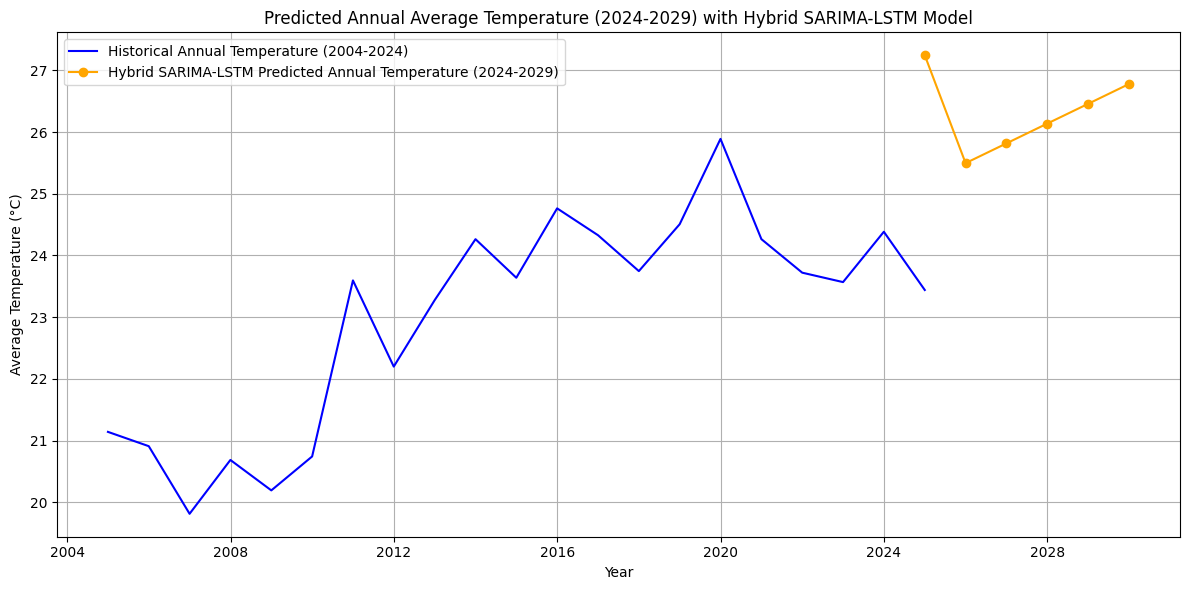

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)
df.set_index('datetime', inplace=True)

# Downsample data to monthly frequency by averaging
monthly_data = df['tempavg'].resample('M').mean()

# Filter data up to July 2024
historical_data = monthly_data[(monthly_data.index.year >= 2004) & (monthly_data.index <= '2024-07-31')]

# Step 1: Train SARIMA Model with Low Memory Mode
# Using simpler orders to reduce computational load
sarima_model = SARIMAX(historical_data, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12), low_memory=True).fit(disp=False)
sarima_pred = sarima_model.predict(start=historical_data.index[0], end='2024-07-31')
residuals = historical_data - sarima_pred  # Calculate residuals for LSTM

# Step 2: Train LSTM on Residuals
# Normalize residuals for LSTM training
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_normalized = scaler.fit_transform(residuals.dropna().values.reshape(-1, 1))

# Prepare data for LSTM with sequence input
sequence_length = 12  # Using 12 months (1 year) as input to predict the next month
X_train, y_train = [], []
for i in range(sequence_length, len(residuals_normalized)):
    X_train.append(residuals_normalized[i-sequence_length:i, 0])
    y_train.append(residuals_normalized[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM

# Define and compile the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model on residuals
lstm_model.fit(X_train, y_train, batch_size=1, epochs=10)

# Step 3: Predict Future Temperatures with SARIMA and LSTM
# Generate SARIMA forecast from August 2024 to December 2029
sarima_forecast = sarima_model.get_forecast(steps=(5 * 12 + 5))  # 5 years + 5 months (Aug 2024 - Dec 2029)
sarima_forecast_values = sarima_forecast.predicted_mean

# Generate LSTM predictions for residuals (August 2024 - December 2029)
future_predictions_lstm = []
current_input = residuals_normalized[-sequence_length:]  # Start with the last observed sequence from the training data

for i in range(5 * 12 + 5):  # Predict for 5 years + 5 months (August 2024 - December 2029)
    current_input = np.reshape(current_input, (1, sequence_length, 1))  # Reshape current_input to match LSTM input shape
    next_pred = lstm_model.predict(current_input)  # Get the next prediction
    future_predictions_lstm.append(next_pred[0, 0])  # Store the prediction
    
    # Update current_input by appending the new prediction and removing the oldest step
    next_input = np.array([next_pred[0, 0]])  # Reshape next_pred to match dimensions
    current_input = np.append(current_input[:, 1:, :], [[next_input]], axis=1)  # Slide the window

# Inverse transform LSTM predictions for residuals
future_predictions_lstm = scaler.inverse_transform(np.array(future_predictions_lstm).reshape(-1, 1))

# Combine SARIMA and LSTM predictions for the hybrid model
future_predictions_hybrid = sarima_forecast_values + future_predictions_lstm.flatten()

# Generate future dates for the predictions
future_dates = pd.date_range(start='2024-08-01', periods=5*12 + 5, freq='M')

# Step 4: Plot Annual Predictions with Trend
# Aggregate to annual data for trend visualization
historical_annual = historical_data.resample('Y').mean()
predicted_annual = pd.Series(future_predictions_hybrid, index=future_dates).resample('Y').mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(historical_annual.index, historical_annual, label='Historical Annual Temperature (2004-2024)', color='blue')
plt.plot(predicted_annual.index, predicted_annual, label='Hybrid SARIMA-LSTM Predicted Annual Temperature (2024-2029)', color='orange', marker='o')
plt.title('Predicted Annual Average Temperature (2024-2029) with Hybrid SARIMA-LSTM Model')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3004529523.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['tempavg'].resample('M').mean()
C:\Users\26485\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['low_memory']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Epoch 1/10


C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0092
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0021
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0016
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0015
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011  
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0022
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/

C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3004529523.py:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-08-01', periods=5*12 + 5, freq='M')
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3004529523.py:83: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  historical_annual = historical_data.resample('Y').mean()
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3004529523.py:84: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  predicted_annual = predicted_monthly.resample('Y').mean()


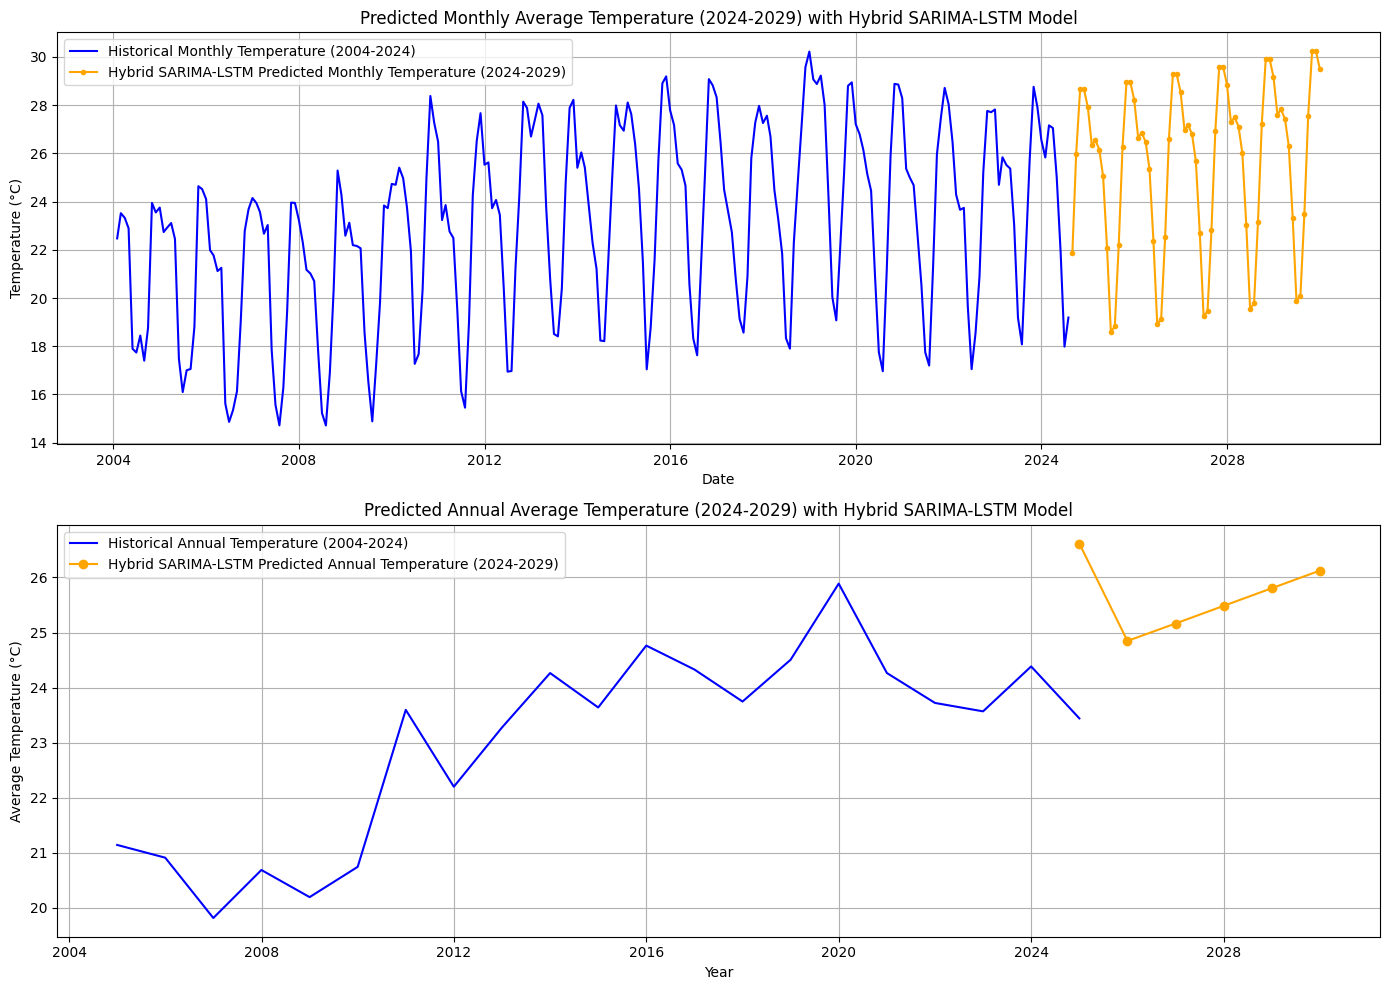

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)
df.set_index('datetime', inplace=True)

# Downsample data to monthly frequency by averaging
monthly_data = df['tempavg'].resample('M').mean()

# Filter data up to July 2024
historical_data = monthly_data[(monthly_data.index.year >= 2004) & (monthly_data.index <= '2024-07-31')]

# Step 1: Train SARIMA Model with Low Memory Mode
sarima_model = SARIMAX(historical_data, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12), low_memory=True).fit(disp=False)
sarima_pred = sarima_model.predict(start=historical_data.index[0], end='2024-07-31')
residuals = historical_data - sarima_pred  # Calculate residuals for LSTM

# Step 2: Train LSTM on Residuals
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_normalized = scaler.fit_transform(residuals.dropna().values.reshape(-1, 1))

# Prepare data for LSTM with sequence input
sequence_length = 12  # 12 months as input to predict the next month
X_train, y_train = [], []
for i in range(sequence_length, len(residuals_normalized)):
    X_train.append(residuals_normalized[i-sequence_length:i, 0])
    y_train.append(residuals_normalized[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM

# Define and compile the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model on residuals
lstm_model.fit(X_train, y_train, batch_size=1, epochs=10)

# Step 3: Predict Future Temperatures with SARIMA and LSTM
# Generate SARIMA forecast from August 2024 to December 2029
sarima_forecast = sarima_model.get_forecast(steps=(5 * 12 + 5))  # 5 years + 5 months (Aug 2024 - Dec 2029)
sarima_forecast_values = sarima_forecast.predicted_mean

# Generate LSTM predictions for residuals (August 2024 - December 2029)
future_predictions_lstm = []
current_input = residuals_normalized[-sequence_length:]  # Start with the last observed sequence from the training data

for i in range(5 * 12 + 5):  # Predict for 5 years + 5 months (August 2024 - December 2029)
    current_input = np.reshape(current_input, (1, sequence_length, 1))  # Reshape current_input to match LSTM input shape
    next_pred = lstm_model.predict(current_input)  # Get the next prediction
    future_predictions_lstm.append(next_pred[0, 0])  # Store the prediction
    
    # Update current_input by appending the new prediction and removing the oldest step
    next_input = np.array([next_pred[0, 0]])  # Reshape next_pred to match dimensions
    current_input = np.append(current_input[:, 1:, :], [[next_input]], axis=1)  # Slide the window

# Inverse transform LSTM predictions for residuals
future_predictions_lstm = scaler.inverse_transform(np.array(future_predictions_lstm).reshape(-1, 1))

# Combine SARIMA and LSTM predictions for the hybrid model
future_predictions_hybrid = sarima_forecast_values + future_predictions_lstm.flatten()

# Generate future dates for the predictions
future_dates = pd.date_range(start='2024-08-01', periods=5*12 + 5, freq='M')

# Convert predictions to a Series for easier plotting
predicted_monthly = pd.Series(future_predictions_hybrid, index=future_dates)

# Step 4: Plot Monthly and Annual Predictions with Trend
# Aggregate to annual data for trend visualization
historical_annual = historical_data.resample('Y').mean()
predicted_annual = predicted_monthly.resample('Y').mean()

# Plot the results
plt.figure(figsize=(14, 10))

# Monthly Plot
plt.subplot(2, 1, 1)
plt.plot(historical_data.index, historical_data, label='Historical Monthly Temperature (2004-2024)', color='blue')
plt.plot(predicted_monthly.index, predicted_monthly, label='Hybrid SARIMA-LSTM Predicted Monthly Temperature (2024-2029)', color='orange', marker='o', markersize=3, linestyle='-')
plt.title('Predicted Monthly Average Temperature (2024-2029) with Hybrid SARIMA-LSTM Model')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Annual Plot
plt.subplot(2, 1, 2)
plt.plot(historical_annual.index, historical_annual, label='Historical Annual Temperature (2004-2024)', color='blue')
plt.plot(predicted_annual.index, predicted_annual, label='Hybrid SARIMA-LSTM Predicted Annual Temperature (2024-2029)', color='orange', marker='o')
plt.title('Predicted Annual Average Temperature (2024-2029) with Hybrid SARIMA-LSTM Model')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
##PREDICTIONS EVALUATION RESULTS

C:\Users\26485\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\26485\AppData\Local\Temp\ipykernel_7280\2639603420.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['tempavg'].resample('M').mean()
C:\Users\26485\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['low_memory']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0114
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0012
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0014
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0020
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0017
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0025
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0016
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0013
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0012
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0014
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

C:\Users\26485\AppData\Local\Temp\ipykernel_7280\2639603420.py:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-08-01', periods=5*12 + 5, freq='M')
C:\Users\26485\AppData\Local\Temp\ipykernel_7280\2639603420.py:84: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  historical_annual = historical_data.resample('Y').mean()
C:\Users\26485\AppData\Local\Temp\ipykernel_7280\2639603420.py:85: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  predicted_annual = predicted_monthly.resample('Y').mean()


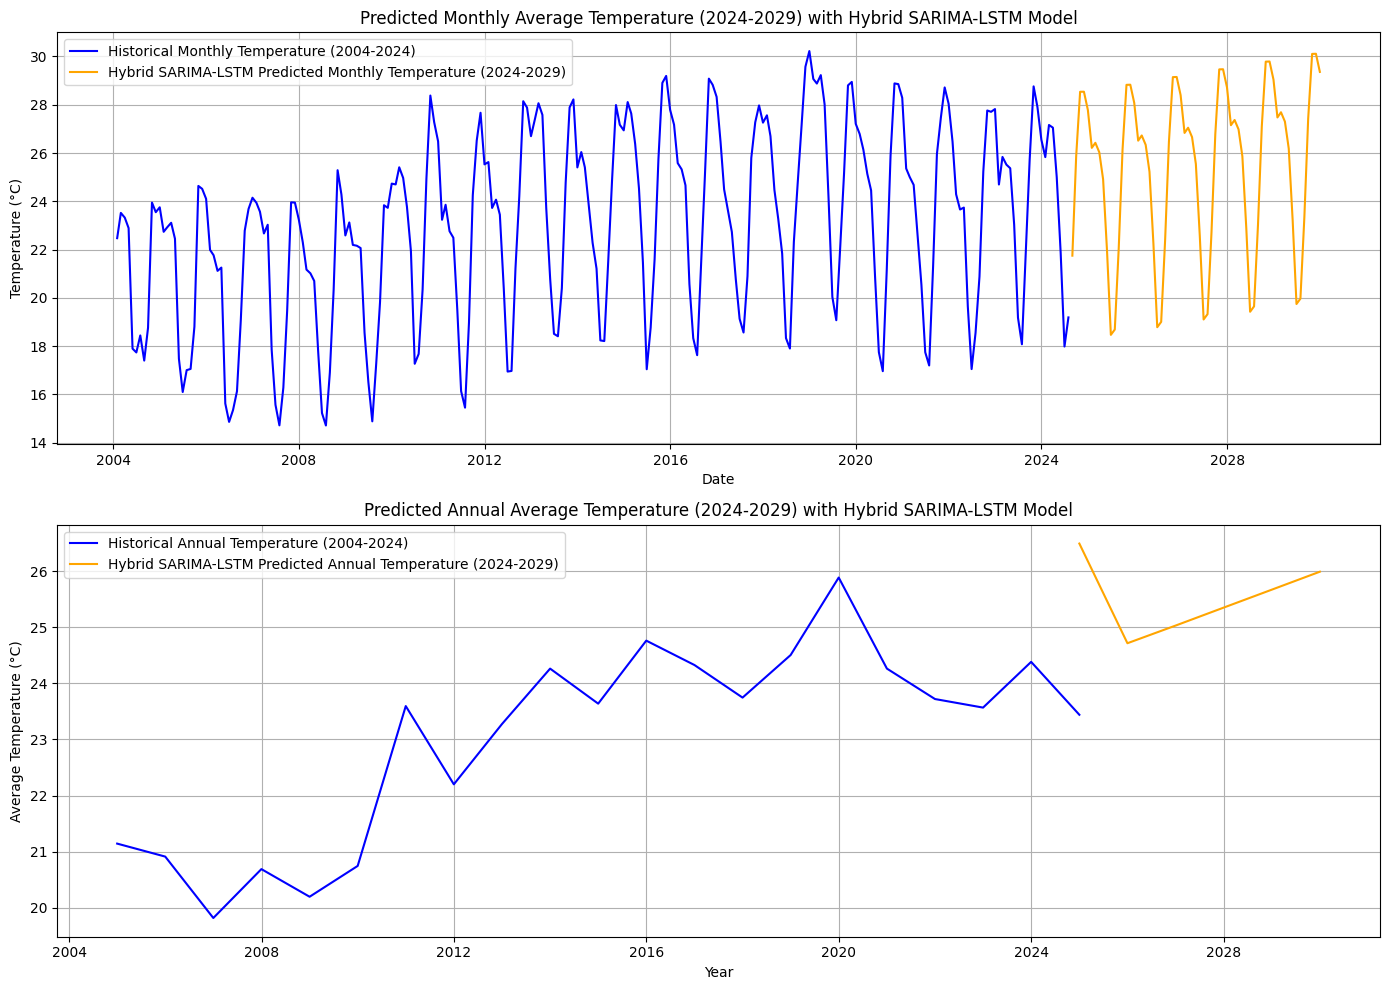

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)
df.set_index('datetime', inplace=True)

# Downsample data to monthly frequency by averaging
monthly_data = df['tempavg'].resample('M').mean()

# Filter data up to July 2024
historical_data = monthly_data[(monthly_data.index.year >= 2004) & (monthly_data.index <= '2024-07-31')]

# Step 1: Train SARIMA Model
sarima_model = SARIMAX(historical_data, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12), low_memory=True).fit(disp=False)
sarima_pred = sarima_model.predict(start=historical_data.index[0], end='2024-07-31')
residuals = historical_data - sarima_pred  # Calculate residuals for LSTM

# Step 2: Train LSTM on Residuals
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_normalized = scaler.fit_transform(residuals.dropna().values.reshape(-1, 1))

# Prepare data for LSTM with sequence input
sequence_length = 12  # 12 months as input to predict the next month
X_train, y_train = [], []
for i in range(sequence_length, len(residuals_normalized)):
    X_train.append(residuals_normalized[i-sequence_length:i, 0])
    y_train.append(residuals_normalized[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM

# Define and compile the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model on residuals
lstm_model.fit(X_train, y_train, batch_size=1, epochs=10)

# Step 3: Predict Future Temperatures with SARIMA and LSTM
# Generate SARIMA forecast from August 2024 to December 2029
sarima_forecast = sarima_model.get_forecast(steps=(5 * 12 + 5))  # 5 years + 5 months (Aug 2024 - Dec 2029)
sarima_forecast_values = sarima_forecast.predicted_mean

# Generate LSTM predictions for residuals (August 2024 - December 2029)
future_predictions_lstm = []
current_input = residuals_normalized[-sequence_length:]  # Start with the last observed sequence from the training data

for i in range(5 * 12 + 5):  # Predict for 5 years + 5 months (August 2024 - December 2029)
    current_input = np.reshape(current_input, (1, sequence_length, 1))  # Reshape current_input to match LSTM input shape
    next_pred = lstm_model.predict(current_input)  # Get the next prediction
    future_predictions_lstm.append(next_pred[0, 0])  # Store the prediction
    
    # Update current_input by appending the new prediction and removing the oldest step
    next_input = np.array([next_pred[0, 0]])  # Reshape next_pred to match dimensions
    current_input = np.append(current_input[:, 1:, :], [[next_input]], axis=1)  # Slide the window

# Inverse transform LSTM predictions for residuals
future_predictions_lstm = scaler.inverse_transform(np.array(future_predictions_lstm).reshape(-1, 1))

# Combine SARIMA and LSTM predictions for the hybrid model
future_predictions_hybrid = sarima_forecast_values + future_predictions_lstm.flatten()

# Generate future dates for the predictions
future_dates = pd.date_range(start='2024-08-01', periods=5*12 + 5, freq='M')

# Convert predictions to a Series for easier plotting
predicted_monthly = pd.Series(future_predictions_hybrid, index=future_dates)

# Step 4: Plot Monthly and Annual Predictions
historical_annual = historical_data.resample('Y').mean()
predicted_annual = predicted_monthly.resample('Y').mean()

plt.figure(figsize=(14, 10))

# Monthly Plot
plt.subplot(2, 1, 1)
plt.plot(historical_data.index, historical_data, label='Historical Monthly Temperature (2004-2024)', color='blue')
plt.plot(predicted_monthly.index, predicted_monthly, label='Hybrid SARIMA-LSTM Predicted Monthly Temperature (2024-2029)', color='orange')
plt.title('Predicted Monthly Average Temperature (2024-2029) with Hybrid SARIMA-LSTM Model')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Annual Plot
plt.subplot(2, 1, 2)
plt.plot(historical_annual.index, historical_annual, label='Historical Annual Temperature (2004-2024)', color='blue')
plt.plot(predicted_annual.index, predicted_annual, label='Hybrid SARIMA-LSTM Predicted Annual Temperature (2024-2029)', color='orange')
plt.title('Predicted Annual Average Temperature (2024-2029) with Hybrid SARIMA-LSTM Model')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Ensure the lengths of true and predicted values align
historical_data_aligned = historical_data[-len(predicted_monthly):]  # Align historical data to the prediction range

# Step 5: Evaluate Predictions
def evaluate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)

    threshold = true_values.mean()  # Example threshold: mean temperature
    true_binary = (true_values >= threshold).astype(int)
    pred_binary = (predicted_values >= threshold).astype(int)

    accuracy = accuracy_score(true_binary, pred_binary)
    precision = precision_score(true_binary, pred_binary, zero_division=0)
    recall = recall_score(true_binary, pred_binary, zero_division=0)
    f1 = f1_score(true_binary, pred_binary, zero_division=0)

    return mae, rmse, r2, accuracy, precision, recall, f1

# Evaluate monthly predictions (aligning lengths)
mae_monthly, rmse_monthly, r2_monthly, acc_monthly, prec_monthly, rec_monthly, f1_monthly = evaluate_metrics(
    historical_data_aligned, predicted_monthly[:len(historical_data_aligned)]
)

# Evaluate annual predictions
historical_annual_aligned = historical_annual[-len(predicted_annual):]
mae_annual, rmse_annual, r2_annual, acc_annual, prec_annual, rec_annual, f1_annual = evaluate_metrics(
    historical_annual_aligned, predicted_annual[:len(historical_annual_aligned)]
)

# Display results
results = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R-squared', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Monthly Predictions': [mae_monthly, rmse_monthly, r2_monthly, acc_monthly, prec_monthly, rec_monthly, f1_monthly],
    'Annual Predictions': [mae_annual, rmse_annual, r2_annual, acc_annual, prec_annual, rec_annual, f1_annual]
})




In [ ]:
##HISTORICAL CLIMATE ANALYSIS

C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3259715299.py:19: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  wet_avg_temp = wet_data['tempavg'].resample('Y').mean()  # Average annual temperature for wet season
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3259715299.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dry_avg_temp = dry_data['tempavg'].resample('Y').mean()  # Average annual temperature for dry season


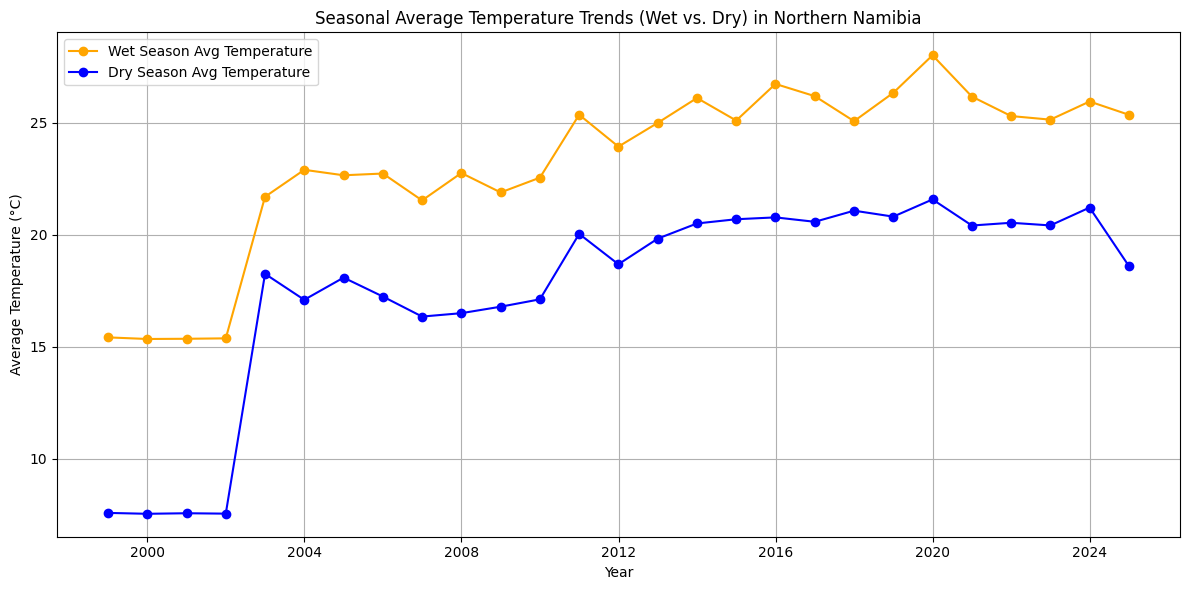

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)
df.set_index('datetime', inplace=True)

# Define wet and dry months for northern Namibia
wet_months = [10, 11, 12, 1, 2, 3, 4, 5]  # October to May
dry_months = [6, 7, 8, 9]                 # June to September

# Separate temperature data for wet and dry months
wet_data = df[df.index.month.isin(wet_months)]
dry_data = df[df.index.month.isin(dry_months)]

# Calculate monthly average temperature for each season (group by year and season)
wet_avg_temp = wet_data['tempavg'].resample('Y').mean()  # Average annual temperature for wet season
dry_avg_temp = dry_data['tempavg'].resample('Y').mean()  # Average annual temperature for dry season

# Plotting seasonal temperature patterns
plt.figure(figsize=(12, 6))

# Plot Wet Season Temperature Trends
plt.plot(wet_avg_temp.index, wet_avg_temp, label='Wet Season Avg Temperature', color='orange', marker='o')
# Plot Dry Season Temperature Trends
plt.plot(dry_avg_temp.index, dry_avg_temp, label='Dry Season Avg Temperature', color='blue', marker='o')

# Formatting the plot
plt.title('Seasonal Average Temperature Trends (Wet vs. Dry) in Northern Namibia')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\26485\AppData\Local\Temp\ipykernel_9824\1451996331.py:19: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  wet_rainfall = wet_data['precip'].resample('Y').sum()  # Total rainfall for wet season per year
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\1451996331.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dry_rainfall = dry_data['precip'].resample('Y').sum()  # Total rainfall for dry season per year


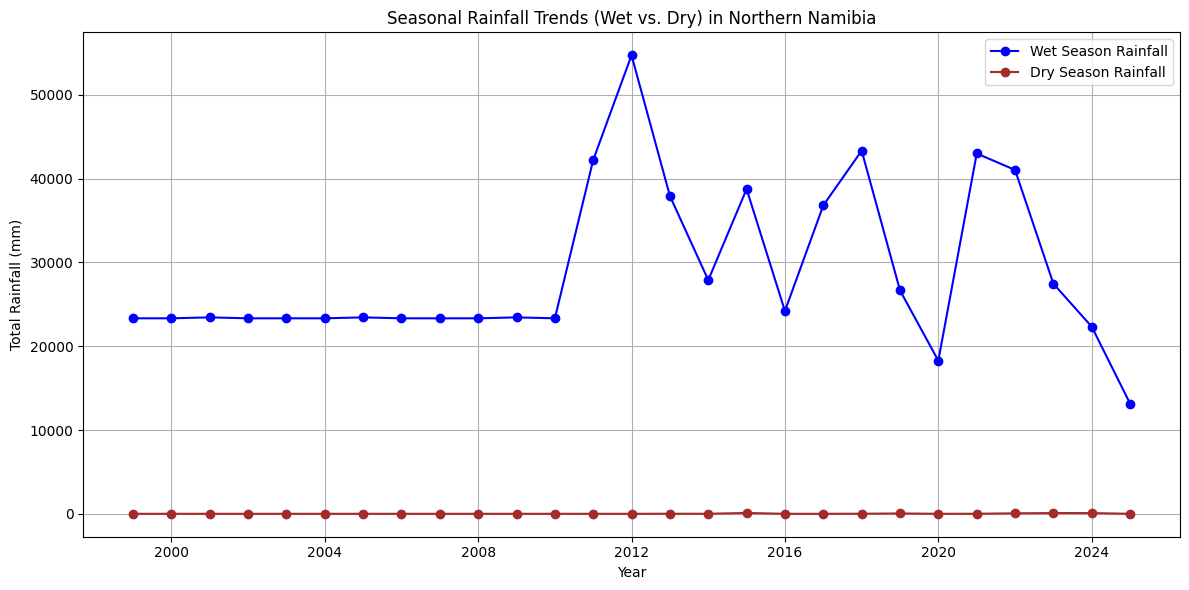

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)
df.set_index('datetime', inplace=True)

# Define wet and dry months for northern Namibia
wet_months = [10, 11, 12, 1, 2, 3, 4, 5]  # October to May
dry_months = [6, 7, 8, 9]                 # June to September

# Separate rainfall data for wet and dry months
wet_data = df[df.index.month.isin(wet_months)]
dry_data = df[df.index.month.isin(dry_months)]

# Calculate seasonal rainfall totals for each year
wet_rainfall = wet_data['precip'].resample('Y').sum()  # Total rainfall for wet season per year
dry_rainfall = dry_data['precip'].resample('Y').sum()  # Total rainfall for dry season per year

# Plotting seasonal rainfall trends
plt.figure(figsize=(12, 6))

# Plot Wet Season Rainfall Trends
plt.plot(wet_rainfall.index, wet_rainfall, label='Wet Season Rainfall', color='blue', marker='o')
# Plot Dry Season Rainfall Trends
plt.plot(dry_rainfall.index, dry_rainfall, label='Dry Season Rainfall', color='brown', marker='o')

# Formatting the plot
plt.title('Seasonal Rainfall Trends (Wet vs. Dry) in Northern Namibia')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3599819964.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rainfall_data = df['2010-01-01':'2024-12-31']['precip'].resample('Y').sum()
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\3599819964.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  temperature_data = df['2003-01-01':'2024-12-31']['tempavg'].resample('Y').mean()


Rainfall Trend Test (2010-2024)
Slope: -1450.0467857142858, p-value: 0.02582210584532966

Temperature Trend Test (2003-2024)
Slope: 0.21215834104755144, p-value: 1.2110707906632149e-05


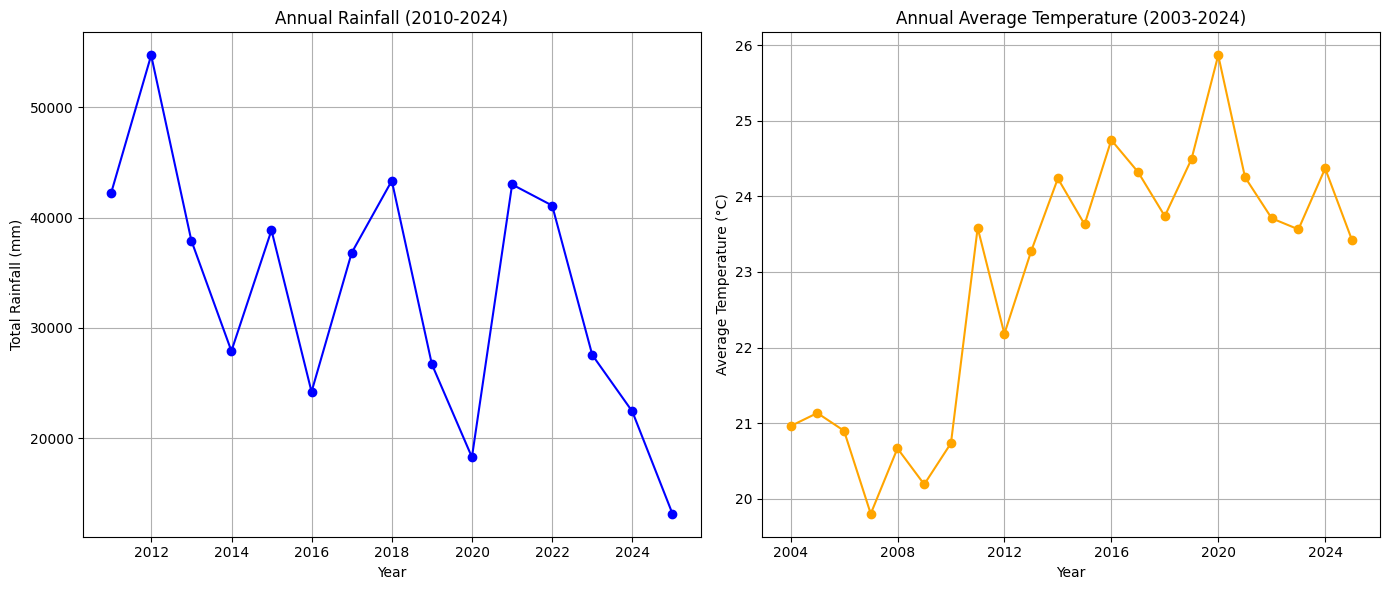

In [31]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Load data (Assume df contains 'datetime', 'precip', 'tempavg')
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)

# Sort by datetime to ensure proper slicing
df = df.set_index('datetime').sort_index()

# Check if required columns exist
if 'precip' in df.columns and 'tempavg' in df.columns:
    # Hypothesis 1: Rainfall Trend Test (2010-2024)
    rainfall_data = df['2010-01-01':'2024-12-31']['precip'].resample('Y').sum()
    slope, intercept, r_value, p_value, std_err = linregress(rainfall_data.index.year, rainfall_data.values)
    print("Rainfall Trend Test (2010-2024)")
    print(f"Slope: {slope}, p-value: {p_value}")

    # Hypothesis 2: Temperature Trend Test (2003-2024)
    temperature_data = df['2003-01-01':'2024-12-31']['tempavg'].resample('Y').mean()
    slope, intercept, r_value, p_value, std_err = linregress(temperature_data.index.year, temperature_data.values)
    print("\nTemperature Trend Test (2003-2024)")
    print(f"Slope: {slope}, p-value: {p_value}")

    # Plotting to visualize
    plt.figure(figsize=(14, 6))

    # Rainfall plot
    plt.subplot(1, 2, 1)
    plt.plot(rainfall_data.index, rainfall_data.values, marker='o', color='blue')
    plt.title("Annual Rainfall (2010-2024)")
    plt.xlabel("Year")
    plt.ylabel("Total Rainfall (mm)")
    plt.grid(True)

    # Temperature plot
    plt.subplot(1, 2, 2)
    plt.plot(temperature_data.index, temperature_data.values, marker='o', color='orange')
    plt.title("Annual Average Temperature (2003-2024)")
    plt.xlabel("Year")
    plt.ylabel("Average Temperature (°C)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'precip' and/or 'tempavg' are not present in the dataset.")


In [32]:
##Mannkendall

!pip install pymannkendall


In [34]:
import pymannkendall as mk
import pandas as pd

# Load your data
df = pd.read_csv('df1 (1).csv', parse_dates=['datetime'])
df.set_index('datetime', inplace=True)

# Ensure the index is sorted
df.sort_index(inplace=True)

# Resample the data to yearly totals and averages
try:
    # Filtering the data for rainfall and temperature for the specified time periods
    rainfall_data = df['2010-01-01':'2024-12-31']['precip'].resample('Y').sum()
    temperature_data = df['2003-01-01':'2024-12-31']['tempavg'].resample('Y').mean()
except KeyError as e:
    print(f"KeyError encountered: {e}")
    print("Make sure the datetime index is properly set and contains the specified dates.")
    raise

# Mann-Kendall test for rainfall (2010-2024)
rainfall_mk_test = mk.original_test(rainfall_data)
print("Rainfall Mann-Kendall Test Results (2010-2024)")
print(rainfall_mk_test)

# Mann-Kendall test for temperature (2003-2024)
temperature_mk_test = mk.original_test(temperature_data)
print("\nTemperature Mann-Kendall Test Results (2003-2024)")
print(temperature_mk_test)


C:\Users\26485\AppData\Local\Temp\ipykernel_9824\4012871060.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df1 (1).csv', parse_dates=['datetime'])


Rainfall Mann-Kendall Test Results (2010-2024)
Mann_Kendall_Test(trend='decreasing', h=True, p=0.037666922228628774, z=-2.0784609690826525, Tau=-0.4095238095238095, s=-43.0, var_s=408.3333333333333, slope=-1483.0474999999997, intercept=47199.7025)

Temperature Mann-Kendall Test Results (2003-2024)
Mann_Kendall_Test(trend='increasing', h=True, p=0.0015876396047747043, z=3.158168135806891, Tau=0.48917748917748916, s=113.0, var_s=1257.6666666666667, slope=0.20214991063155985, intercept=21.451535527409717)


C:\Users\26485\AppData\Local\Temp\ipykernel_9824\4012871060.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rainfall_data = df['2010-01-01':'2024-12-31']['precip'].resample('Y').sum()
C:\Users\26485\AppData\Local\Temp\ipykernel_9824\4012871060.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  temperature_data = df['2003-01-01':'2024-12-31']['tempavg'].resample('Y').mean()
